# *Metadata*

The **Million Song Dataset** is a freely-available collection of audio features and metadata for a million contemporary popular music tracks. The core of the dataset is the feature analysis and metadata for one million songs, provided by **The Echo Nest**(acquired by Spotify now). The dataset does not include any audio, **only the derived features**. This project focuses on song recommendation system. There are three main approaches :

1.   *Popularity Based Recommendation*
2.   *Content Based Recommendation*
3.   *User Based Recommendation (Collaborative)*

For the Content Based Recommendation alone we have used **LyricsFreak** dataset from Kaggle that has song_names, artist_names, link and lyrics for 5760 songs.

# *Loading the Data and Importing required modules*

In [ ]:
#mounting the drive for easy access of the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

In [ ]:
#reading the dataset that contains the songs and their play_counts
user_data = pd.read_csv('/content/drive/MyDrive/DM Datasets/KaggleMillionSongs/triplets_file.csv')
user_data.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [ ]:
 #reading the dataset containing metadata of 2M songs
 song_data = pd.read_csv('/content/drive/MyDrive/DM Datasets/KaggleMillionSongs/song_data.csv')
 song_data.drop_duplicates(['song_id'], inplace=True)
 song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


# *Popularity Based Recommendation*

In [ ]:
print(user_data.shape, song_data.shape)

(2000000, 3) (999056, 5)


In [ ]:
print(len(user_data), len(song_data))

2000000 999056


In [ ]:
print("{} is the difference in uniqueness of the songs".format(len(song_data['song_id']) - len(song_data['song_id'].unique())))

0 is the difference in uniqueness of the songs


In [ ]:
songs_df = pd.merge(user_data, song_data, on = 'song_id', how = "left")
songs_df.head(10)

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


In [ ]:
songs_df['song_name'] = songs_df['title'] + ' - ' + songs_df['artist_name']
songs_df.head(5)

,user_id,song_id,listen_count,title,release,artist_name,year,song_name
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [ ]:
songs_df['listen_count'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
listen_count,2e+06,3.04548,6.57972,1,1,1,3,2213


In [ ]:
songs_df_backup = songs_df


In [ ]:
del(songs_df['song_id'])

In [ ]:
user_data.listen_count.max()

2213

In [ ]:
# User count increases with decrease in 'listen_count' (2000 being an outlier)
print("{} users listen to the same song more than 10 times".format(len(user_data.user_id[user_data.listen_count > 10].unique())))

28197 users listen to the same song more than 10 times


In [ ]:
# grouping the data song names based on the 'listen count' 
listen_count_df = songs_df.groupby(songs_df['song_name']).agg({'listen_count' : 'count'})
listen_count_df

,listen_count
song_name,
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version) - The Notorious B.I.G.,78
#40 - DAVE MATTHEWS BAND,338
& Down - Boys Noize,373
' Cello Song - Nick Drake,103
'97 Bonnie & Clyde - Eminem,93
...,...
the Love Song - K-OS,70
you were there with me - Four Tet,79
¡Viva La Gloria! (Album Version) - Green Day,171


In [ ]:
# sorting the dataframe in descending order of 'listen_count'
popularity_list = listen_count_df.sort_values(['listen_count', 'song_name'], ascending = [0, 1]).reset_index()
popularity_list

,song_name,listen_count
0,Sehr kosmisch - Harmonia,8277
1,Undo - Björk,7032
2,Dog Days Are Over (Radio Edit) - Florence + Th...,6949
3,You're The One - Dwight Yoakam,6412
4,Revelry - Kings Of Leon,6145
...,...,...
9948,Historia Del Portero - Ricardo Arjona,51
9949,Scared - Three Days Grace,51
9950,Don´t Leave Me Now - Amparanoia,50
9951,Ghosts (Toxic Avenger Mix) - Ladytron,48


In [ ]:
# printing the least popular song
print("The Least Popular Song : \n\n {}".format(popularity_list.min().T))

The Least Popular Song : 

 song_name       #!*@ You Tonight [Featuring R. Kelly] (Explici...
listen_count                                                   48
dtype: object


In [ ]:
# printing the most popular
print("The Most Popular Song : \n\n {}".format(popularity_list.max().T))

The Most Popular Song : 

 song_name       Época - Gotan Project
listen_count                     8277
dtype: object


In [ ]:
# recommends songs that are most popular based on the global data 
print("Top 10 Popular Songs for you")
popularity_list.head(10)

Top 10 Popular Songs for you


,song_name,listen_count
0,Sehr kosmisch - Harmonia,8277
1,Undo - Björk,7032
2,Dog Days Are Over (Radio Edit) - Florence + Th...,6949
3,You're The One - Dwight Yoakam,6412
4,Revelry - Kings Of Leon,6145
5,Secrets - OneRepublic,5841
6,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385
7,Fireflies - Charttraxx Karaoke,4795
8,Hey_ Soul Sister - Train,4758
9,Tive Sim - Cartola,4548


In [ ]:
def create_popularity_chart(df, user_id, item_id, n):

    # getting the count of user_ids for each unique item_id as recommendation score
    grouped = df.groupby([item_id]).agg({user_id: 'count'}).reset_index()
    grouped.rename(columns = {user_id: 'score'},inplace=True)
    
    # sort the songs based upon recommendation score
    sorted = grouped.sort_values(['score', item_id], ascending = [0,1])
    
    # getting a recommendation rank based upon score
    sorted['Rank'] = sorted.score.rank(ascending=0, method='first')
        
    # get the top n recommendations
    popularity_recommendations = sorted.head(n)
    return popularity_recommendations

In [ ]:
song_recommendations = create_popularity_chart(songs_df,'user_id','song_name', 10)
song_recommendations

,song_name,score,Rank
7127,Sehr kosmisch - Harmonia,8277,1.0
9084,Undo - Björk,7032,2.0
2068,Dog Days Are Over (Radio Edit) - Florence + Th...,6949,3.0
9880,You're The One - Dwight Yoakam,6412,4.0
6774,Revelry - Kings Of Leon,6145,5.0
7115,Secrets - OneRepublic,5841,6.0
3613,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385,7.0
2717,Fireflies - Charttraxx Karaoke,4795,8.0
3485,Hey_ Soul Sister - Train,4758,9.0
8847,Tive Sim - Cartola,4548,10.0


In [ ]:
artist_recommendation = create_popularity_chart(songs_df,'user_id','artist_name', 10)
artist_recommendation

,artist_name,score,Rank
649,Coldplay,29422,1.0
2850,The Black Keys,19862,2.0
1651,Kings Of Leon,18747,3.0
1107,Florence + The Machine,18112,4.0
1370,Jack Johnson,17801,5.0
2946,The Killers,16063,6.0
2374,Radiohead,14890,7.0
736,Daft Punk,14715,8.0
2073,Muse,14005,9.0
1554,Justin Bieber,13959,10.0


# *User Based Recommendation*

In [ ]:
songs = pd.merge(user_data, song_data, on="song_id", how="left")

In [ ]:
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
songs_backup = songs

In [ ]:
collab_songs = songs

In [ ]:
collab_songs.shape

(2000000, 7)

In [ ]:
collab_songs.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64

In [ ]:
collab_songs.dtypes

user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

In [ ]:
uniq_songs = collab_songs['title'].unique().shape[0]
print(f"Unique Songs : {uniq_songs}")

Unique Songs : 9567


In [ ]:
uniq_artists = collab_songs['artist_name'].unique().shape[0]
print(f"Unique Artists : {uniq_artists}")

Unique Artists : 3375


In [ ]:
uniq_users = collab_songs['user_id'].unique().shape[0]
print(f"Unique Users : {uniq_users}")

Unique Users : 76353


In [ ]:
# to know the average number of songs listened
song_user = collab_songs.groupby('user_id')['song_id'].count()
song_user

user_id
00003a4459f33b92906be11abe0e93efc423c0ff     7
00005c6177188f12fb5e2e82cdbd93e8a3f35e64     5
00030033e3a2f904a48ec1dd53019c9969b6ef1f     9
0007235c769e610e3d339a17818a5708e41008d9    10
0007c0e74728ca9ef0fe4eb7f75732e8026a278b     9
                                            ..
fffce9c1537fbc350ea68823d956eaa8f5236dbe    44
fffd6a2bdef646ce9898b628d5dd56c43df69a9d    11
fffd9635b33f412de8ed02e44e6564e3644cf3c6    17
fffe6d1d8500f1c1f31bd63abce35c0f975a86bf     7
fffea3d509760c984e7d40789804c0e5e289cc86    23
Name: song_id, Length: 76353, dtype: int64

In [ ]:
print(f"Average number of songs a user listens to : {np.mean(song_user)}")

Average number of songs a user listens to : 26.194124657839247


In [ ]:
print(f"Average number of songs a user listens to : {np.median(song_user)}")
print(f"Minimum Songs : {np.min(song_user)}")
print(f"Maximum Songs : {np.max(song_user)}")

Average number of songs a user listens to : 16.0
Minimum Songs : 1
Maximum Songs : 711


#### **Inference :** Not all users listen to all songs as the maximum number of songs listened by a user is 711 whereas the total number of unique songs in the dataset is 9567.

#### This shows us that our matrix is going to be **extremely sparse**. (A sparse matrix is a matrix that is comprised of mostly 'zero' values.)

In [ ]:
# what-if all songs are heard by all users
matrix_with_values = uniq_users * uniq_songs

In [ ]:
matrix_with_zeros = matrix_with_values - collab_songs.shape[0]

In [ ]:
print(f"Number of zeros in such a sparse matrix : {matrix_with_zeros}")

Number of zeros in such a sparse matrix : 728469151


#### A Sparse matrix of this size is very diffuclt to handle(both in memory and space). It would majorly affect our accuracy. 

#### Hence let's consider, only the users who have listened to atleast 16 songs.

In [ ]:
users_morethan_16 = song_user[song_user > 16].index.to_list()

In [ ]:
songid_morethan_16 = collab_songs[collab_songs['user_id'].isin(users_morethan_16)].reset_index(drop=True)

In [ ]:
# use csr_matrix

songs_features = songid_morethan_16.pivot(index='song_id', columns='user_id', values='listen_count').fillna(0)

AttributeError: ignored

In [ ]:
# getting a sparse matrix
new_songs_features = csr_matrix(songs_features.values)
songs_features.head()

user_id,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,000ebc858861aca26bac9b49f650ed424cf882fc,000ef25cc955ad5841c915d269432eea41f4a1a5,0012bf75d43a724f62dc746d9e85ae0088a3a1d6,001322829b5dc3edc59bf78189617ddd8f23c82a,00185e316f07f0f00c325ca034be59c15b362401,0019740e3e8c24e223a6f88e3faa7c144ec5a014,001b005fe5e80d3cb45f320f5658fc8e2e72794e,001f22c638730aed5659034c447d3cf0e658898e,0021d9a4628624f6d70237f9c200ab82e766bf26,002543003041db1d049206b09426d5cdffc0f451,0028292aa536122c1f86fd48a39bd83fe582d27f,00292cf9c6d6e99c5ddbece7e37f957ab1362d25,00296f66ed7fb84c876486aecc9fab2d5809576d,0030822badc23ef6500a72ce7feda1c63faf2262,0031572620fa7f18487d3ea22935eb28410ecc4c,003412e33eb3d05573f7811c1ba61d6a15be5690,00342a0cdf56a45465f09a39040a5bc25b7d0046,00388e5764c59488ec06a109c88b39f59a2b6361,0039bd8483d578997718cdc0bf6c7c88b679f488,003ac50a4e6ed0c9085fecb7a1738730e7ea4942,003bfb50126f91f6389aaee733f5b3e0a8d5cbe0,003d0f3aac94fd261bb74c0124a90750579972d4,003d21762b29fe2ffe20fb9a51eb1e02ebeb3242,003d6d799d58e1fce362f5f4f6c7bcc26c8f3546,003e3919f41dbb8ff05a75623d205f6abcede4fc,003f1064ed75d1156352cd89b25fb752bcc10b13,003f1e939952a57d1a5bc990727acad5ceea97b4,00409f6a83c2bf4299ab6ae2dea958050537b5a9,0041925615557845642a7b1257fdc6229fe1ee5d,00454c72c0b4b99f9cc81ba0b1989597a43669d6,0045c60d98ced5efb3cbf1e0b4b7de1da3f1a506,00488ec44caa0d2fa669780f8cb604bf39e94392,004c7be9336ca88824e1e0b09ef9a2168200fa33,004dc9f93f5ad4a75f9a3ba0da5dd887b31d6bd2,004f6065fa9840913f62e52d94d9c29ea1d26fe1,004fcdf8829d68f4e45ef846ad9f308c4493ed8e,0051a2e7b452e3dc67f48688442032df557897f4,00544d8bde0d7985e8d703c1eb676d41cad33c67,00546de8971645143eead323561d0298d5b0f2be,...,ffb63da2222280f299a7a896edea073728aab343,ffb7096f3eeee706825b4a8c3fab98ce0e0b4216,ffb8299fcb3f31716c93fb8a77dee0d1dbb210f9,ffba3563fd590a51dabc1dfcb8a27119e6035241,ffbc58b89c81227a08ee05d90259bdd9172b9479,ffbe437f18c3bea5c78596c5f3183ee62d440b6c,ffc2563e7dd136bf371371cd21f0cc404a1d7499,ffc564b85d81f0ea427cee3eea2415cc2fc5c4be,ffc5b3bd0575330eb8c4ae4f3b9cabd3ba315dbb,ffc66b4520671da6b2a67a0326201565160d9650,ffc9966885909a0b42493b2558be9dc451317488,ffcc2cff250ea22471df09e76f59e2be0debae72,ffcfb0b34a47fdf55b3d96c1799cd196677f8261,ffd1d617221f5bf00de80ee3eb5d2a17fc8d077d,ffd25d7da8b4e54ea2cde25dd3b52d0e0aef7a5d,ffd458f903d49854685cf4540245c1d297e8bafa,ffd6f34b343cee62cd7dbbf20fb1ab1119b299e5,ffda2736b2204ece3b19e941caacad4106d00ed5,ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046,ffdb5557e4e24da051ebd6b45ec18c524c55dc40,ffdbaeb5cf2081eb34053a655c20f57524de11ba,ffde97c0d23bf5ce249ce73e630ccb4e7293cc32,ffe2a7e7b6689071f8c699d944b52ce590ae4636,ffe33dce4e652a4dc4824cc39680a9f709cfdfb3,ffebfec313fd515a11faba060b022f030b57fac0,ffecbb84f3dde31b0b2e64d70b7b7e5092bf7427,ffef9c3e59ab44554a9775af5e3b2ac149111bb6,fff03efd1550136063389fa71125194614e1c68f,fff0b1ab076f0b71cbde9c7dcbcfca400708d845,fff22417a61c1ba3ee2592b22a052ed6a27a8e91,fff300cd094fe04030b79fae550dc9d065190182,fff4676dacb2e9a7217702f62ee70e88aa512ecc,fff4e1a7dacbe9c13051c08f09bf66d76cbee35e,fff543db7918cb8f4f56f7470903eb2f1d5a6dd8,fff6c30c773e6ffafcac213c9afd9666afaf6d63,fffb701ee87a32eff67eb040ed59146121f01571,fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c,fffce9c1537fbc350ea68823d956eaa8f5236dbe,fffd9635b33f412de8ed02e44e6564e3644cf3c6,fffea3d509760c984e7d40789804c0e5e289cc86
song_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SOAAAGQ12A8C1420C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACPJ12A81C21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
# we want songs names
uniq = collab_songs.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'title']]

In [ ]:
mapped_songs = {
    song: i for i, song in enumerate(list(uniq.set_index('song_id').loc[songs_features.index].title))
}

In [ ]:
pip install fuzzywuzzy

In [ ]:
pip install python-Levenshtein

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('file.py','wb').write(src)
import file

In [ ]:
model = file.Recommender(metric='cosine', algorithm='brute', k=20, data=new_songs_features, decode_id_song=mapped_songs)

AttributeError: ignored

In [ ]:
!pip install surprise

In [ ]:
from surprise import SVD,Dataset,reader
from surprise.model_selection import cross_validate
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(content_songs,content_songs))

In [ ]:
data = Dataset.load_from_df(content_songs[['artist_name', 'song_id', 'title`']], reader)
data.split(n_folds=5)
cross_validate(SVD(),song_data,measures=["RMSE","MAE"])
#y_pred=model.model.predict(song_data)

In [ ]:
song = 'I believe in miracles'

In [ ]:
recos = model.make_recommendation(new_song=song, n_recommendations=5)

In [ ]:
print(f'The recommendations for "{song}" are:')
for i in recos:    
    print(f">> {i}", end = "\n")

# *Content Based Recommendation*

In [ ]:
from typing import List, Dict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
content_songs = pd.read_csv("/content/drive/MyDrive/KaggleMillionSongs/song_data.csv")

In [ ]:
content_songs.shape

(57650, 4)

In [ ]:
content_songs.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [ ]:
# sampling
content_songs = content_songs.sample(n=5000).drop('link', axis=1).reset_index(drop=True)

KeyError: ignored

In [ ]:
content_songs['text'] = content_songs['text'].str.replace(r'\n', '')

KeyError: ignored

In [ ]:
# word-by-word tfid score
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics = tfidf.fit_transform(content_songs['title'].apply(lambda x:np.str_(x)))
#x = v.fit_transform(df['Review'].apply(lambda x: np.str_(x)))

In [ ]:
# finding the cosine similarities
cosine = cosine_similarity(lyrics)

In [ ]:
similarities = {}

In [ ]:
for i in range(len(cosine)):
  # getting sorted song indexes based on cosine similarities
  similar_indices = cosine[i].argsort()[:-50:-1]
  similarities[content_songs['song'].iloc[i]] = [(cosine[i][x], content_songs['song'][x], content_songs['artist'][x]) for x in similar_indices][1:]

In [ ]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score") 
            print("--------------------")
        
    def recommend(self, recommendation):
        # Get song to find recommendations for
        song = recommendation['song']
        # Get number of songs to recommend
        number_songs = recommendation['number_songs']
        # Get the number of songs most similars from matrix similarities
        recom_song = self.matrix_similar[song][:number_songs]
        # print each item
        self._print_message(song=song, recom_song=recom_song)

In [ ]:
recommendations = ContentBasedRecommender(similarities)

In [ ]:
song1 = {
    "song" : content_songs['song'].iloc[15], 
    "number_songs" : 25
}

In [ ]:
recommendations.recommend(song1)

The 25 recommended songs for Once Upon A Time In The Projects are:
Number 1:
With A Little Love by Modern Talking with 0.264 similarity score
--------------------
Number 2:
You Can't Fade Me by Ice Cube with 0.246 similarity score
--------------------
Number 3:
Scary Story by Will Smith with 0.222 similarity score
--------------------
Number 4:
Cold Places by Ice Cube with 0.222 similarity score
--------------------
Number 5:
Who Said by Miley Cyrus with 0.216 similarity score
--------------------
Number 6:
You Mean I'm Not? by Korn with 0.214 similarity score
--------------------
Number 7:
Bring It On by Snoop Dogg with 0.214 similarity score
--------------------
Number 8:
Stop Snitchin' by Ice Cube with 0.203 similarity score
--------------------
Number 9:
Blow Me by Kid Rock with 0.197 similarity score
--------------------
Number 10:
The Heart Gently Weeps by Wu-Tang Clan with 0.19 similarity score
--------------------
Number 11:
Clothes Line by Bob Dylan with 0.184 similarity score

In [ ]:
song2 = {
    "song" : content_songs['song'].iloc[150],
    "number_songs" : 10
}

In [ ]:
recommendations.recommend(song2)

The 10 recommended songs for That Name are:
Number 1:
My Hope by Planetshakers with 0.369 similarity score
--------------------
Number 2:
Unconditional Love by Cyndi Lauper with 0.363 similarity score
--------------------
Number 3:
Mission's Flame by Matt Redman with 0.354 similarity score
--------------------
Number 4:
Heal Me Oh Lord by Don Moen with 0.317 similarity score
--------------------
Number 5:
Great In Power by Hillsong United with 0.312 similarity score
--------------------
Number 6:
Praise Him by Planetshakers with 0.311 similarity score
--------------------
Number 7:
Beautiful Savior by Planetshakers with 0.294 similarity score
--------------------
Number 8:
Jesus The Same by Indiana Bible College with 0.286 similarity score
--------------------
Number 9:
Hallellujah Song by Matt Redman with 0.267 similarity score
--------------------
Number 10:
Sing Your Praise To The Lord by Amy Grant with 0.266 similarity score
--------------------


# New Approach

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8 MB 6.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619409 sha256=3171cf216684a243c5b329e71cbd0dcd52c9b9008fc2e109bf0fe112b73c11a2
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [ ]:
df_songs = pd.read_csv('/content/drive/MyDrive/KaggleMillionSongs/songs.csv')

In [ ]:
df_songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
song_user = df_songs.groupby('song_id')['user_id'].count()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


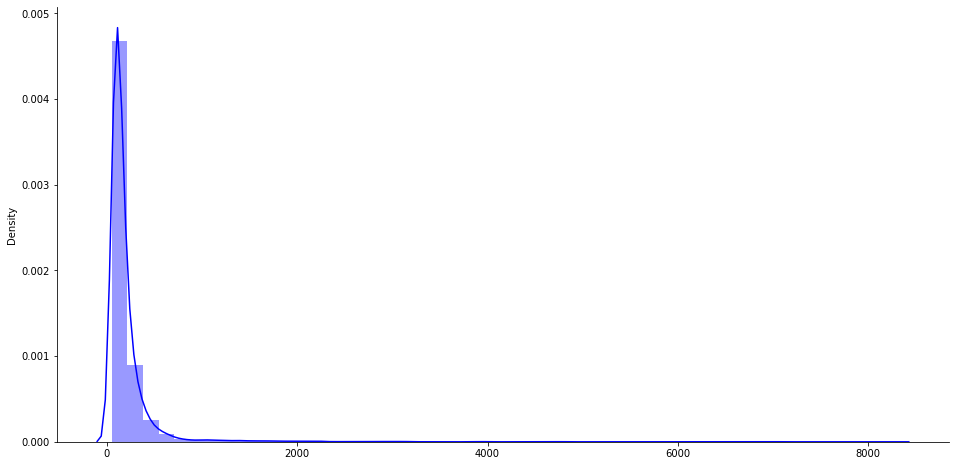

In [ ]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [ ]:
user_counts = df_songs.groupby('user_id')['song_id'].count()
user_ten_id = user_counts[user_counts > 16].index.to_list()
song_counts = df_songs.groupby('song_id')['user_id'].count()
song_ten_id = song_counts[song_counts > 200].index.to_list()
df_song_reduced = df_songs[(df_songs['user_id'].isin(user_ten_id)) & (df_songs['song_id'].isin(song_ten_id))].reset_index(drop=True)
df_song_reduced.shape

(950353, 7)

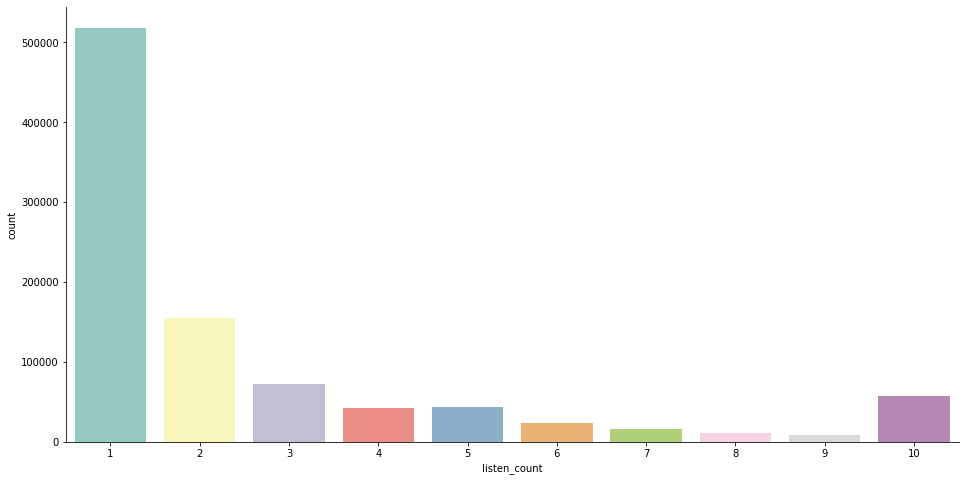

In [ ]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]
df_song_reduced['listen_count'] = pd.cut(df_song_reduced['listen_count'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
listen_counts = pd.DataFrame(df_song_reduced.groupby('listen_count').size(), columns=['count']).reset_index(drop=False)
plt.figure(figsize=(16, 8))
sns.barplot(x='listen_count', y='count', palette='Set3', data=listen_counts)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [ ]:
reader = Reader(rating_scale=(1, 10))
d = Dataset.load_from_df(df_song_reduced[['user_id', 'song_id', 'listen_count']], reader)
trainset, testset = train_test_split(d, test_size=.3)

In [ ]:
param_grid = {'n_factors': [160], 
              'n_epochs': [2], 
              'lr_all': [0.001, 0.005],
              'reg_all': [0.08, 0.1]}

In [ ]:
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=-2)
grid_search_svd.fit(d)
find_algo = grid_search_svd.best_estimator['rmse']
print(grid_search_svd.best_score['rmse'])
print(grid_search_svd.best_params['rmse'])

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   3 out of   3 | elapsed:   33.1s remaining:    0.0s


2.3865785295088817
{'n_factors': 160, 'n_epochs': 2, 'lr_all': 0.005, 'reg_all': 0.08}


[Parallel(n_jobs=-2)]: Done  12 out of  12 | elapsed:  2.2min finished


In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))
    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
plot_grid_search(grid_search_svd.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

AttributeError: ignored

In [ ]:
cross_validate(find_algo, d, measures=['RMSE'], cv=5, verbose=True)
final_algorithm = SVD(n_factors=160, n_epochs=4, lr_all=0.005, reg_all=0.1)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.3809  2.3634  2.3752  2.3622  2.3751  2.3714  0.0073  
Fit time          7.10    7.78    8.28    7.89    7.73    7.75    0.38    
Test time         3.18    2.54    3.63    2.48    3.13    2.99    0.43    
RMSE: 2.3206
The RMSE is 2.3206490099065435


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
accuracy_score(test_predictions,testset)

TypeError: ignored

In [ ]:
f1_score(test_predictions, testset)

TypeError: ignored